In [1]:
import numpy as np 
import pandas as pd 
import os, shutil
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
base_dir = os.listdir('../input/skin-cancer-mnist-ham10000') # from Kaggle
base_dir

['hmnist_8_8_RGB.csv',
 'hmnist_28_28_RGB.csv',
 'HAM10000_images_part_1',
 'ham10000_images_part_1',
 'hmnist_8_8_L.csv',
 'HAM10000_images_part_2',
 'ham10000_images_part_2',
 'hmnist_28_28_L.csv',
 'HAM10000_metadata.csv']

# <font color=darkgreen> Reading file: RGB image scale 28 by 28

In [3]:
rgb = pd.read_csv('../input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv')

In [4]:
rgb.head()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2


In [5]:
rgb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Columns: 2353 entries, pixel0000 to label
dtypes: int64(2353)
memory usage: 179.8 MB


# <font color=darkgreen> Display image

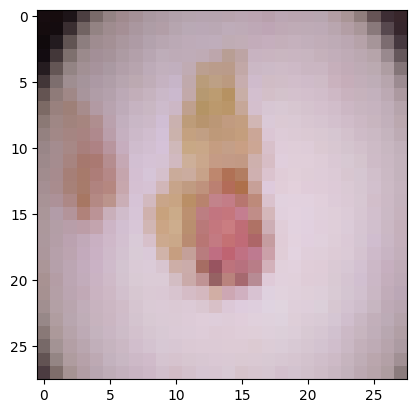

In [6]:
y = rgb['label']
X = rgb.drop(['label'], axis=1)

X1 = np.array(X)
image = X1[10].reshape(28,28,3)
plt.imshow(image)

# <font color=darkgreen> Building Convolutional Neural network

In [7]:

X_train, X_val_test, y_train, y_val_test = train_test_split(X, y,
                                                  test_size=0.4,shuffle = True,
                                                  random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test,
                                                  test_size=0.5,random_state=1)

In [8]:
X_train = X_train/255
X_val = X_val/255
X_test = X_test/255
num_classes = 7

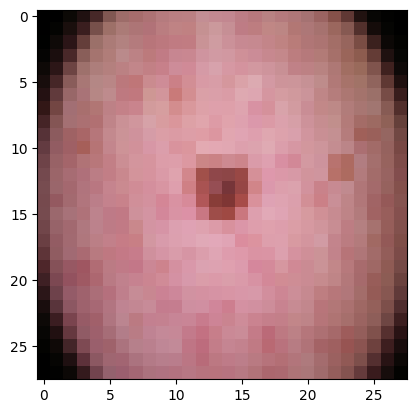

In [9]:
X_train1 = np.array(X_train) #to flatten
n_samples_train = len(y_train.index)
images_train = X_train1.reshape(n_samples_train,28,28,3)
plt.imshow(images_train[10])

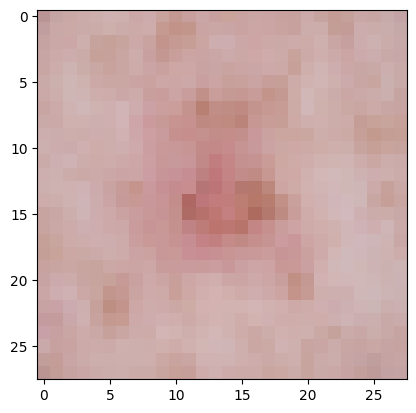

In [10]:
X_val1 = np.array(X_val) #to flatten
n_samples_val = len(y_val.index)
images_val = X_val1.reshape(n_samples_val,28,28,3)
plt.imshow(images_val[10])

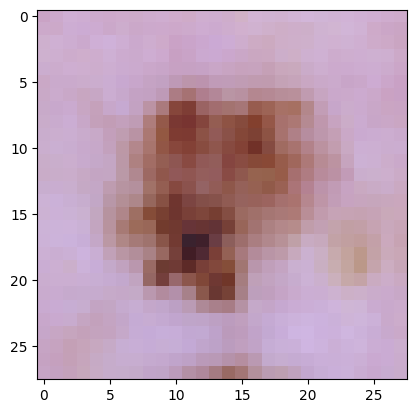

In [11]:
X_test1 = np.array(X_test) 
n_samples_test = len(y_test.index)
images_test = X_test1.reshape(n_samples_test,28,28,3)
plt.imshow(images_test[10])

In [12]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32, (3, 3),padding='same', name ='Convo2D_Layer_1', input_shape=(28, 28, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2),name ='MaxPooling2D_Layer_1' ),
    
    tf.keras.layers.Conv2D(32, (3, 3),padding='same', name ='Convo2D_Layer_2', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2),name ='MaxPooling2D_Layer_2'),
    
    tf.keras.layers.Conv2D(15, (3, 3),padding='same',name ='Convo2D_Layer_3',  activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2),name ='MaxPooling2D_Layer_3'),
    tf.keras.layers.Dropout(0.15,name ='DroupOut_Layer_1'),
    
    tf.keras.layers.Conv2D(5, (3, 3),padding='same',name ='Convo2D_Layer_4',  activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2),name ='MaxPooling2D_Layer_4'),
    
    tf.keras.layers.Dropout(0.2,name ='DroupOut_Layer_2'),
    tf.keras.layers.Flatten(name ='Flatten_Layer_1'),
    
    tf.keras.layers.Dense(7,name ='Dense_Layer',activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convo2D_Layer_1 (Conv2D)    (None, 28, 28, 32)        896       
                                                                 
 MaxPooling2D_Layer_1 (MaxPo  (None, 14, 14, 32)       0         
 oling2D)                                                        
                                                                 
 Convo2D_Layer_2 (Conv2D)    (None, 14, 14, 32)        9248      
                                                                 
 MaxPooling2D_Layer_2 (MaxPo  (None, 7, 7, 32)         0         
 oling2D)                                                        
                                                                 
 Convo2D_Layer_3 (Conv2D)    (None, 7, 7, 15)          4335      
                                                                 
 MaxPooling2D_Layer_3 (MaxPo  (None, 3, 3, 15)         0

In [13]:
# Compiling the model

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3), 
              metrics=['accuracy'])

In [14]:
#training
train = model.fit(images_train, y_train, validation_data=(images_val, y_val), epochs=70, verbose=1)

Epoch 1/70
188/188 [==============================] - 7s 27ms/step - loss: 1.2674 - accuracy: 0.6557 - val_loss: 1.0821 - val_accuracy: 0.6640
Epoch 2/70
188/188 [==============================] - 4s 24ms/step - loss: 1.0663 - accuracy: 0.6687 - val_loss: 1.0064 - val_accuracy: 0.6640
Epoch 3/70
188/188 [==============================] - 5s 24ms/step - loss: 1.0011 - accuracy: 0.6665 - val_loss: 0.9420 - val_accuracy: 0.6640
Epoch 4/70
188/188 [==============================] - 5s 24ms/step - loss: 0.9576 - accuracy: 0.6665 - val_loss: 0.9248 - val_accuracy: 0.6645
Epoch 5/70
188/188 [==============================] - 5s 27ms/step - loss: 0.9369 - accuracy: 0.6700 - val_loss: 0.9302 - val_accuracy: 0.6640
Epoch 6/70
188/188 [==============================] - 5s 24ms/step - loss: 0.9213 - accuracy: 0.6747 - val_loss: 0.8929 - val_accuracy: 0.6650
Epoch 7/70
188/188 [==============================] - 5s 25ms/step - loss: 0.8924 - accuracy: 0.6798 - val_loss: 0.8816 - val_accuracy: 0.6820

In [15]:
# Test
scores = model.evaluate(images_val, y_val, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 71.09%


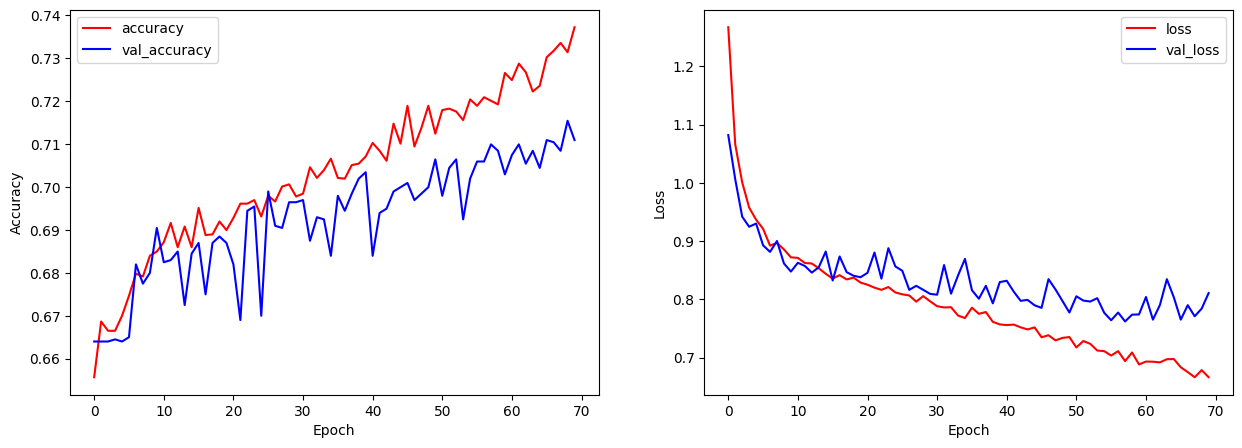

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'],'r', label='accuracy')
plt.plot(train.history['val_accuracy'],'b', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# plt.show()
plt.subplot(1, 2, 2)
plt.plot(train.history['loss'],'r', label='loss')
plt.plot(train.history['val_loss'],'b', label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# <font color=darkgreen> Convolutional Neural network using Batch Normalization

In [17]:
model1 = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32, (3, 3),padding='same', name ='Convo2D_Layer_1', input_shape=(28, 28, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2),name ='MaxPooling2D_Layer_1' ),
    
    tf.keras.layers.Conv2D(32, (3, 3),padding='same', name ='Convo2D_Layer_2', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2),name ='MaxPooling2D_Layer_2'),
    
    tf.keras.layers.Conv2D(15, (3, 3),padding='same',name ='Convo2D_Layer_3',  activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2),name ='MaxPooling2D_Layer_3'),
    tf.keras.layers.Dropout(0.15,name ='DroupOut_Layer_1'),
    
    tf.keras.layers.Conv2D(5, (3, 3),padding='same',name ='Convo2D_Layer_4',  activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2),name ='MaxPooling2D_Layer_4'),
    tf.keras.layers.Dropout(0.2,name ='DroupOut_Layer_2'),
    
    tf.keras.layers.Flatten(name ='Flatten_Layer_1'),
    tf.keras.layers.BatchNormalization(name ='Batch_Normalization_Layer_1'),
    
    tf.keras.layers.Dense(7,name ='Dense_Layer',activation='softmax')
])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Convo2D_Layer_1 (Conv2D)    (None, 28, 28, 32)        896       
                                                                 
 MaxPooling2D_Layer_1 (MaxPo  (None, 14, 14, 32)       0         
 oling2D)                                                        
                                                                 
 Convo2D_Layer_2 (Conv2D)    (None, 14, 14, 32)        9248      
                                                                 
 MaxPooling2D_Layer_2 (MaxPo  (None, 7, 7, 32)         0         
 oling2D)                                                        
                                                                 
 Convo2D_Layer_3 (Conv2D)    (None, 7, 7, 15)          4335      
                                                                 
 MaxPooling2D_Layer_3 (MaxPo  (None, 3, 3, 15)        

In [18]:
# Compiling the model

model1.compile(loss='sparse_categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-3), 
              metrics=['accuracy'])
#training
train = model1.fit(images_train, y_train, validation_data=(images_val, y_val), epochs=70,batch_size=16)

Epoch 1/70
376/376 [==============================] - 8s 18ms/step - loss: 1.5885 - accuracy: 0.4903 - val_loss: 1.2992 - val_accuracy: 0.6640
Epoch 2/70
376/376 [==============================] - 6s 15ms/step - loss: 1.1074 - accuracy: 0.6678 - val_loss: 1.0418 - val_accuracy: 0.6640
Epoch 3/70
376/376 [==============================] - 6s 16ms/step - loss: 1.0431 - accuracy: 0.6698 - val_loss: 1.0146 - val_accuracy: 0.6640
Epoch 4/70
376/376 [==============================] - 6s 15ms/step - loss: 1.0213 - accuracy: 0.6708 - val_loss: 1.0255 - val_accuracy: 0.6645
Epoch 5/70
376/376 [==============================] - 6s 16ms/step - loss: 1.0033 - accuracy: 0.6743 - val_loss: 1.0223 - val_accuracy: 0.6655
Epoch 6/70
376/376 [==============================] - 6s 15ms/step - loss: 1.0016 - accuracy: 0.6757 - val_loss: 0.9832 - val_accuracy: 0.6715
Epoch 7/70
376/376 [==============================] - 6s 16ms/step - loss: 0.9869 - accuracy: 0.6793 - val_loss: 0.9897 - val_accuracy: 0.6750

In [19]:
# Test
scores = model1.evaluate(images_val, y_val, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 71.34%


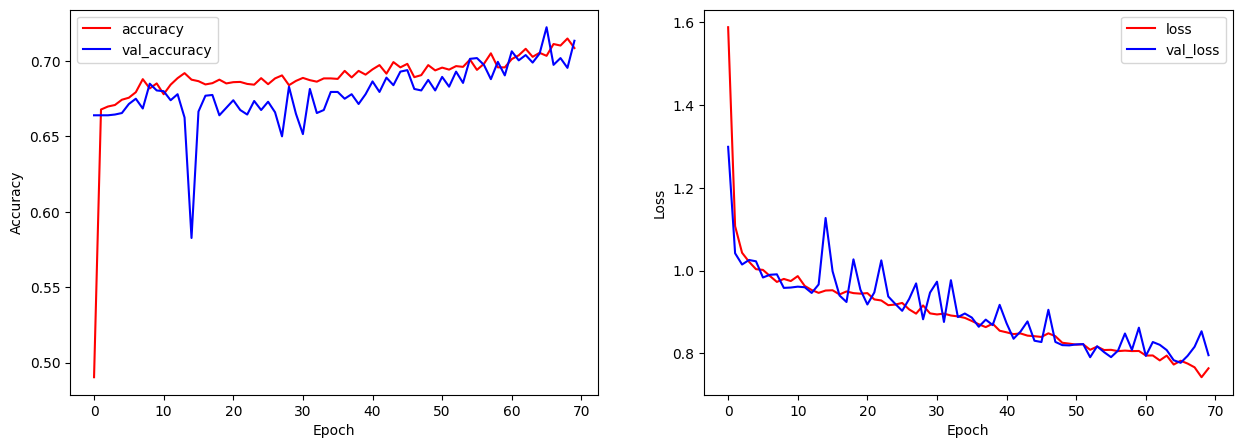

In [20]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.plot(train.history['accuracy'],'r', label='accuracy')
plt.plot(train.history['val_accuracy'],'b', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# plt.show()
plt.subplot(1, 2, 2)
plt.plot(train.history['loss'],'r', label='loss')
plt.plot(train.history['val_loss'],'b', label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()